In [1]:
# cca --- > complete case analysis

# df --- > missing data --- > filter missing data
# new_df = filtered_columns_in_which_we_have_missing_data

# new_df -- > missing_data_drop

# Architecture------> Histogram ---->
# past column in which we have missing data
# updated column in which we have no missing data

# if past data architecture is overlap to new data architecture --- >
# it means we can drop missing data .
# if past data architecture is not overlap to new data architecture --- >
# it means we can not drop missing data .

In [2]:
import numpy as np 
import pandas as pd

In [3]:
df = pd.read_csv("dsjob.csv")
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98


In [5]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     0.000000
gender                    23.860968
relevent_experience        0.000000
enrolled_university        1.456083
education_level            2.442461
major_discipline          14.654767
experience                 0.234852
company_size              29.215594
company_type              29.779239
last_new_job               1.878816
training_hours             0.000000
dtype: float64

In [6]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]

In [7]:
['enrolled_university', 'education_level', 'experience', 'last_new_job']

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [8]:
df[cols].sample(5)

,enrolled_university,education_level,experience,last_new_job
1013,no_enrollment,Graduate,1,1
1407,Part time course,Graduate,>20,2
74,no_enrollment,Graduate,7,1
856,Full time course,Graduate,8,1
780,no_enrollment,Graduate,>20,4


In [9]:
len(df[cols].dropna()) / len(df)

0.9478628464067638

In [10]:
new_df = df[cols]. dropna()
df.shape, new_df.shape

((2129, 13), (2018, 4))

In [12]:
import matplotlib.pyplot as plt

<Axes: >

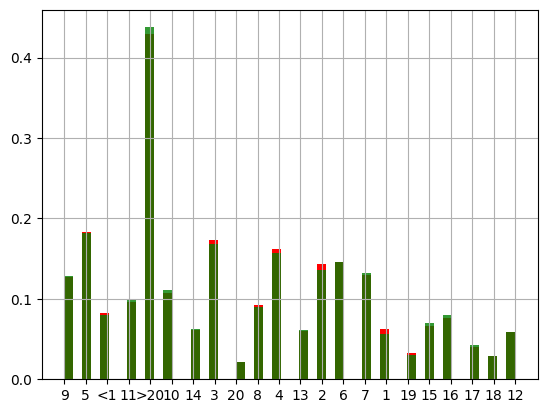

In [14]:
fig = plt.figure()
ax  = fig.add_subplot(111)

# original data 
df['experience'].hist(bins= 50,ax=ax, density=True ,color='red')
# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['experience'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

In [15]:
temp = pd.concat([
        # percentage of observations per category, original data
        df['enrolled_university'].value_counts() / len(df),
        
        # percentageobservtions ger category, cca data
        new_df['enrolled_university'].value_counts() / len(new_df)
    ],        
    axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.713481,0.727948
Full time course,0.204321,0.202180
Part time course,0.067637,0.069871


# covid data cca 

In [16]:
df = pd.read_csv("covid_toy.csv")
df.head(2)

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes


In [17]:
df.isnull().mean()*100

age           0.0
gender        0.0
fever        10.0
cough         0.0
city          0.0
has_covid     0.0
dtype: float64

In [18]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.20 and df[var].isnull().mean() > 0]

In [19]:
['fever']

['fever']

In [20]:
df[cols].sample(5)

,fever
12,99.0
94,NaN
51,100.0
17,98.0
73,98.0


In [21]:
len(df[cols].dropna()) / len(df)

0.9

In [22]:
new_df = df[cols]. dropna()
df.shape, new_df.shape

((100, 6), (90, 1))

<Axes: >

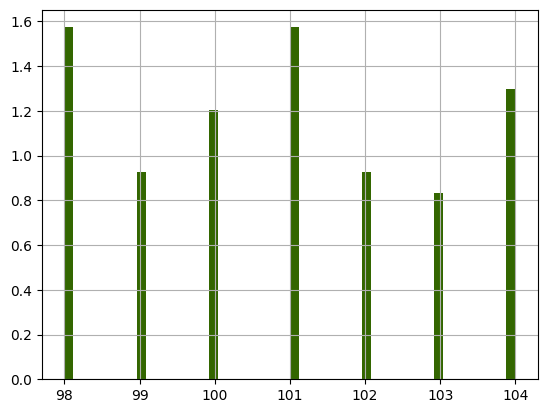

In [24]:
fig = plt.figure()
ax  = fig.add_subplot(111)

# original data 
df['fever'].hist(bins= 50,ax=ax, density=True ,color='red')
# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['fever'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

In [25]:
temp = pd.concat([
        # percentage of observations per category, original data
        df['fever'].value_counts() / len(df),
        
        # percentageobservtions ger category, cca data
        new_df['fever'].value_counts() / len(new_df)
    ],        
    axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
fever,,
101.0,0.17,0.188889
98.0,0.17,0.188889
104.0,0.14,0.155556
100.0,0.13,0.144444
99.0,0.10,0.111111
102.0,0.10,0.111111
103.0,0.09,0.100000


# titanic data cca

In [26]:
df = pd.read_csv("titanic.csv")
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [27]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [30]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.50 and df[var].isnull().mean() > 0]

In [31]:
['Age']

['Age']

In [32]:
df[cols].sample(5)

,Age,Fare
148,NaN,26.5500
402,22.0,59.4000
84,NaN,10.7083
329,21.0,13.0000
212,17.0,73.5000


In [33]:
len(df[cols].dropna()) / len(df)

0.7918660287081339

In [34]:
new_df = df[cols]. dropna()
df.shape, new_df.shape

((418, 12), (331, 2))

<Axes: >

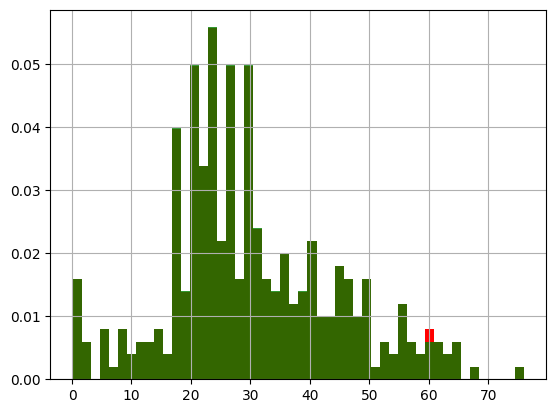

In [35]:
fig = plt.figure()
ax  = fig.add_subplot(111)

# original data 
df['Age'].hist(bins= 50,ax=ax, density=True ,color='red')
# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['Age'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

In [37]:
temp = pd.concat([
        # percentage of observations per category, original data
        df['Age'].value_counts() / len(df),
        
        # percentageobservtions ger category, cca data
        new_df['Age'].value_counts() / len(new_df)
    ],        
    axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
Age,,
21.0,0.040670,0.051360
24.0,0.040670,0.051360
22.0,0.038278,0.048338
30.0,0.035885,0.045317
18.0,0.031100,0.039275
...,...,...
44.0,0.002392,0.003021
5.0,0.002392,0.003021
51.0,0.002392,0.003021
